In [2]:
import plotly

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
from sklearn.preprocessing import LabelEncoder

os.chdir('/Users/rajeshpothamsetty/kaggle/competitions/home-credit-default-risk/input')
os.listdir("../input")

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/Users/rajeshpothamsetty/kaggle/competitions/home-credit-default-risk/input'

In [13]:
application_train = pd.read_csv('../input/application_train.csv')
application_test = pd.read_csv('../input/application_test.csv')
POS_CASH_balance = pd.read_csv('../input/POS_CASH_balance.csv')
bureau_balance = pd.read_csv('../input/bureau_balance.csv')
previous_application = pd.read_csv('../input/previous_application.csv')
installments_payments = pd.read_csv('../input/installments_payments.csv')
credit_card_balance = pd.read_csv('../input/credit_card_balance.csv')
bureau = pd.read_csv('../input/bureau.csv')

In [3]:
print('Size of application_train data', application_train.shape)
print('Size of POS_CASH_balance data', POS_CASH_balance.shape)
print('Size of bureau_balance data', bureau_balance.shape)
print('Size of previous_application data', previous_application.shape)
print('Size of installments_payments data', installments_payments.shape)
print('Size of credit_card_balance data', credit_card_balance.shape)
print('Size of bureau data', bureau.shape)

Size of application_train data (307511, 122)
Size of POS_CASH_balance data (10001358, 8)
Size of bureau_balance data (27299925, 3)
Size of previous_application data (1670214, 37)
Size of installments_payments data (13605401, 8)
Size of credit_card_balance data (3840312, 23)
Size of bureau data (1716428, 17)


In [4]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [6]:
# checking missing data
total = application_train.isnull().sum().sort_values(ascending = False)
percent = (application_train.isnull().sum()/application_train.shape[0]*100).sort_values(ascending = False)
missing_application_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_train_data.head(10)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


In [7]:
# number of columns which are 100% populated in application_train
missing_application_train_data.loc[missing_application_train_data['Total'] == 0, ].shape[0] 

55

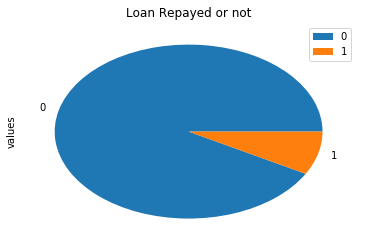

In [8]:
#Check imbalanced data
classification_count = application_train["TARGET"].value_counts() #counts unique values
df = pd.DataFrame({'labels': classification_count.index, 'values': classification_count.values })
#df.plot(kind='pie',labels='labels',values='values', title='Loan Repayed or not')
df.plot(kind='pie',x='labels',y='values', title='Loan Repayed or not')

In [16]:
df_train = application_train
df_test = application_test

# Align the training and testing data, keep only columns present in both dataframes
df_train = df_train.drop('TARGET', axis = 1) #drop target variable from training dataset
df_train, df_test = df_train.align(df_test, join = 'inner', axis = 1)
#assing an extra variable to training and testing dataset before joining them
df_train['training_set'] = True 
df_test['training_set'] = False
df_full = pd.concat([df_train, df_test]) #concatenate both dataframes

encoder = LabelEncoder()
le_count = 0
for col in df_full.columns[1:]:
    if df_full[col].dtype == 'object':
        if len(list(df_full[col].unique())) <= 2:
            print(col)
            encoder.fit(df_full[col])
            df_full[col] = encoder.transform(df_full[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

NAME_CONTRACT_TYPE
FLAG_OWN_CAR
FLAG_OWN_REALTY
3 columns were label encoded.


In [15]:
df_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,training_set
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,True
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,True
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,True
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,True
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,True


In [18]:
print(df_full['CODE_GENDER'].unique())
print(df_full['FLAG_OWN_CAR'].unique())
print(df_full['FLAG_OWN_REALTY'].unique())

['M' 'F' 'XNA']
[0 1]
[1 0]


In [20]:
for col in df_full.columns[1:]:
    if df_full[col].dtype == 'object':
        ln = len(list(df_full[col].unique()))
        if  ln <= 5:
            print('{} with {} unique values.'.format(col, ln))
            le_count += 1
print('{} columns with <= 5 unique values.'.format(le_count))

CODE_GENDER with 3 unique values.
NAME_EDUCATION_TYPE with 5 unique values.
FONDKAPREMONT_MODE with 5 unique values.
HOUSETYPE_MODE with 4 unique values.
EMERGENCYSTATE_MODE with 3 unique values.
13 columns with <= 5 unique values.


In [21]:
application_train['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)